Reading ../Data/TRF/Morlet_Vis_All_power-tfr.h5 ...
Reading ../Data/TRF/Morlet_Pron_All_power-tfr.h5 ...
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


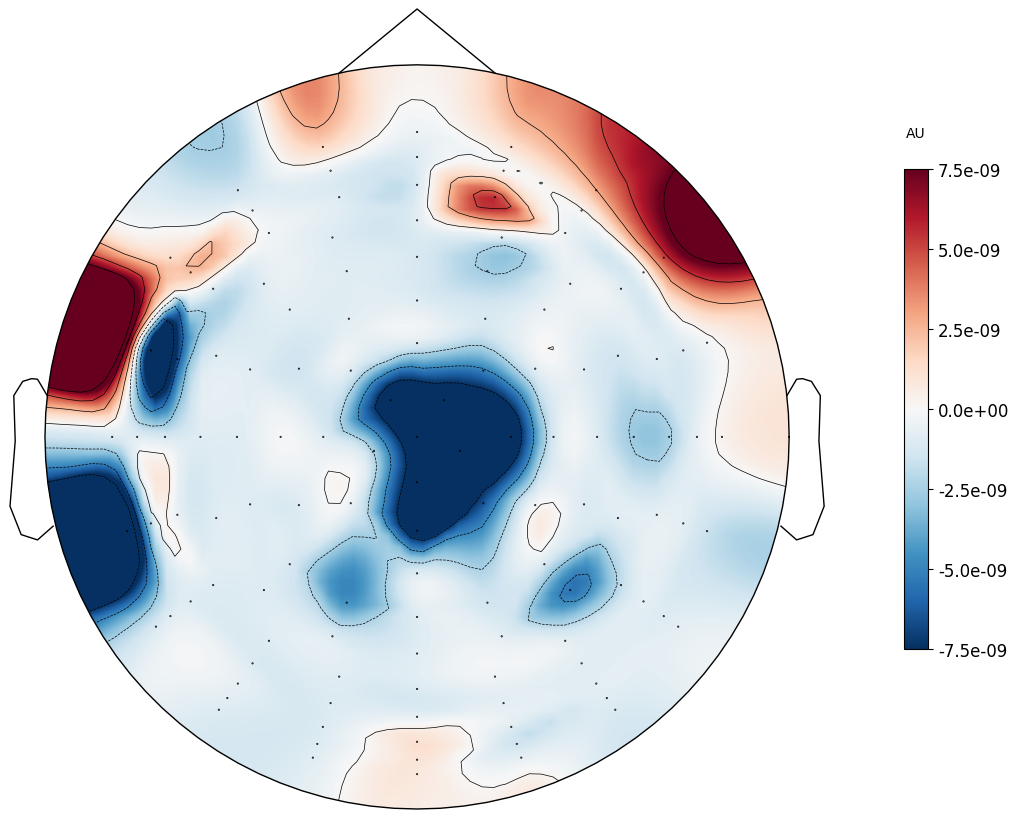

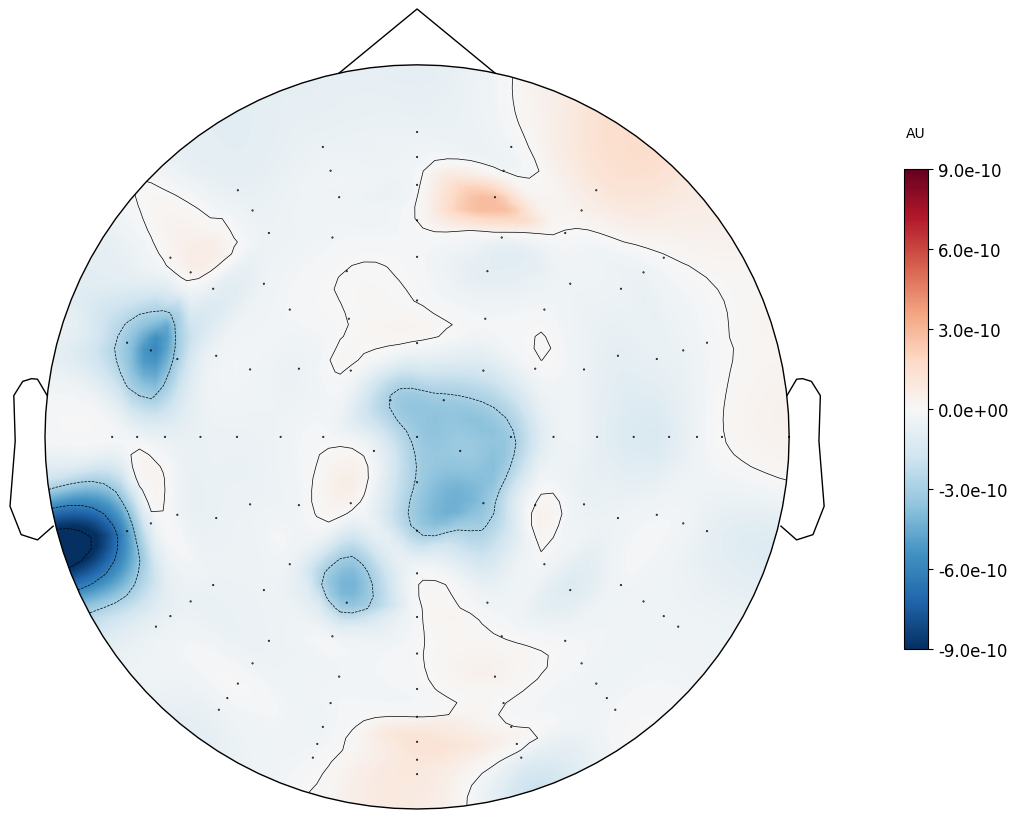

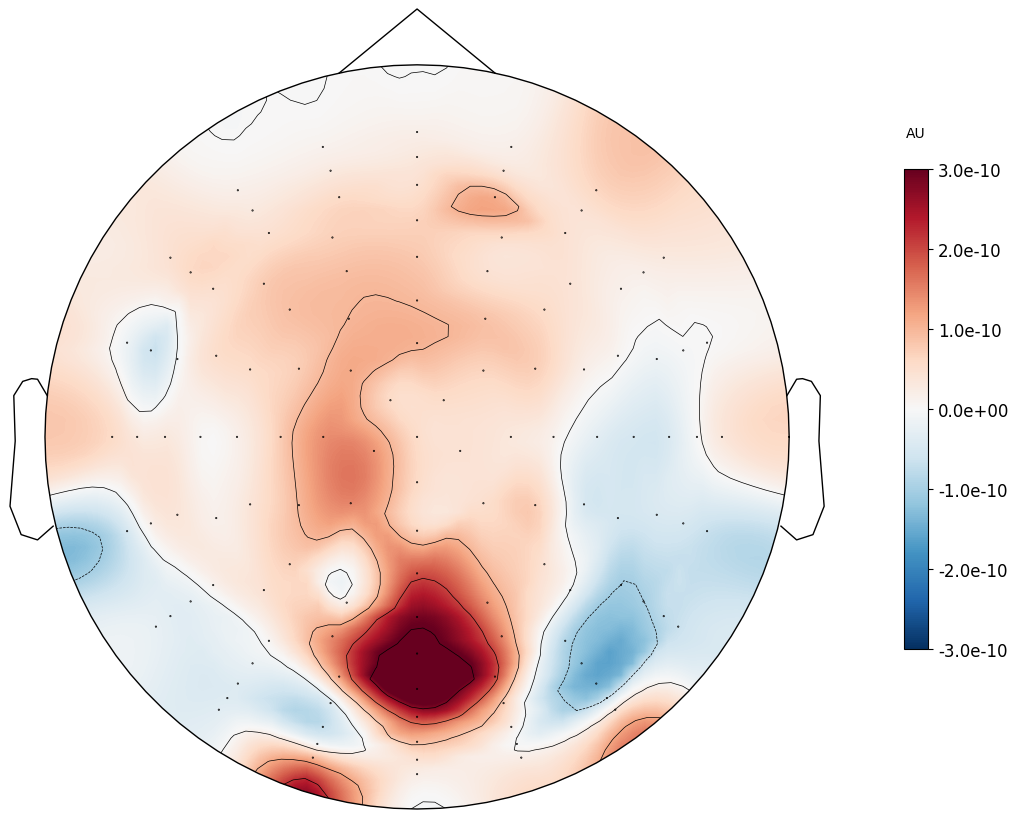

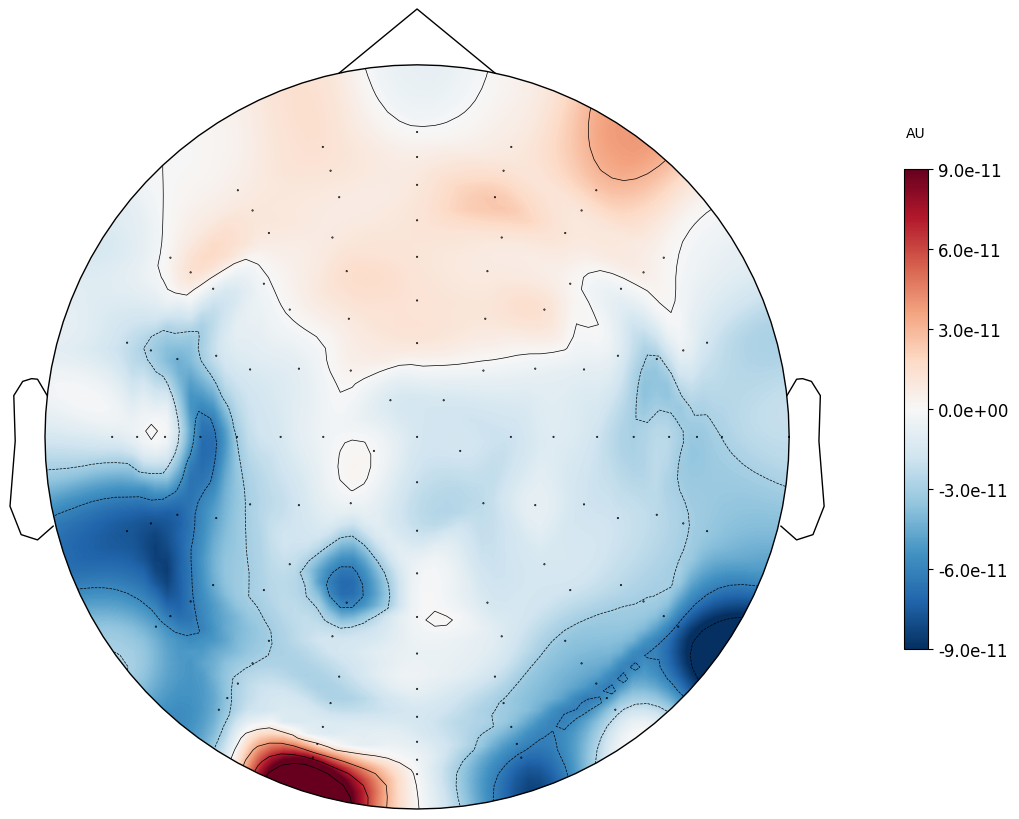

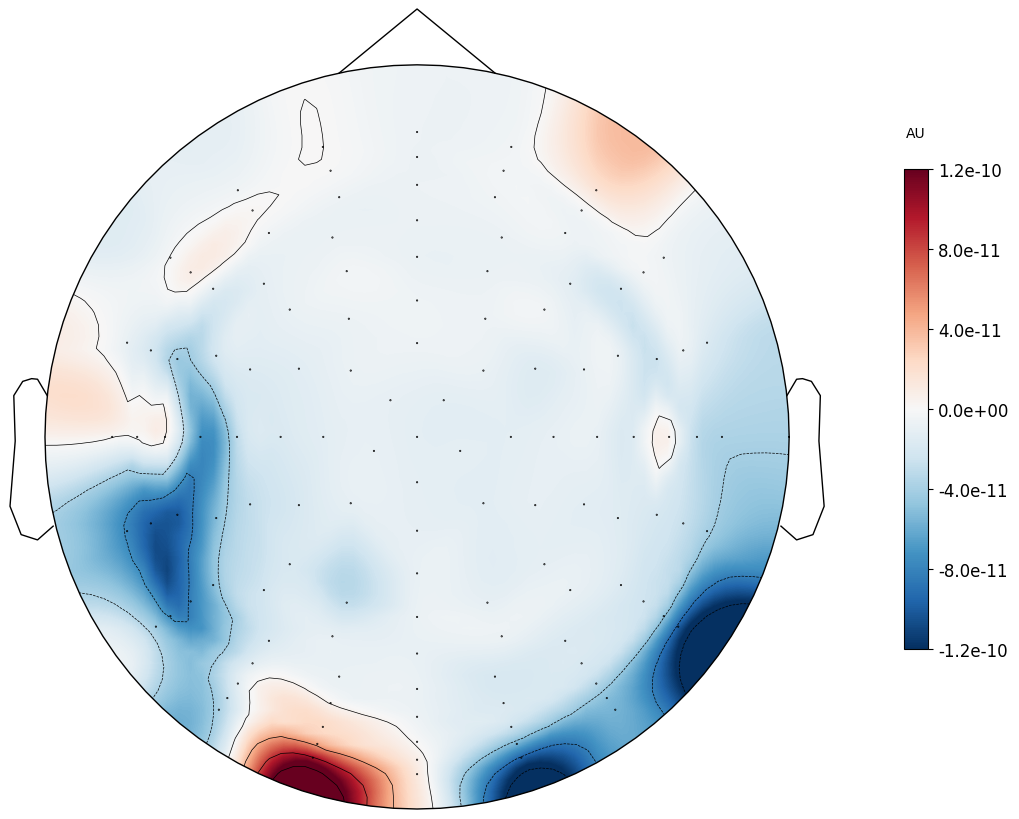

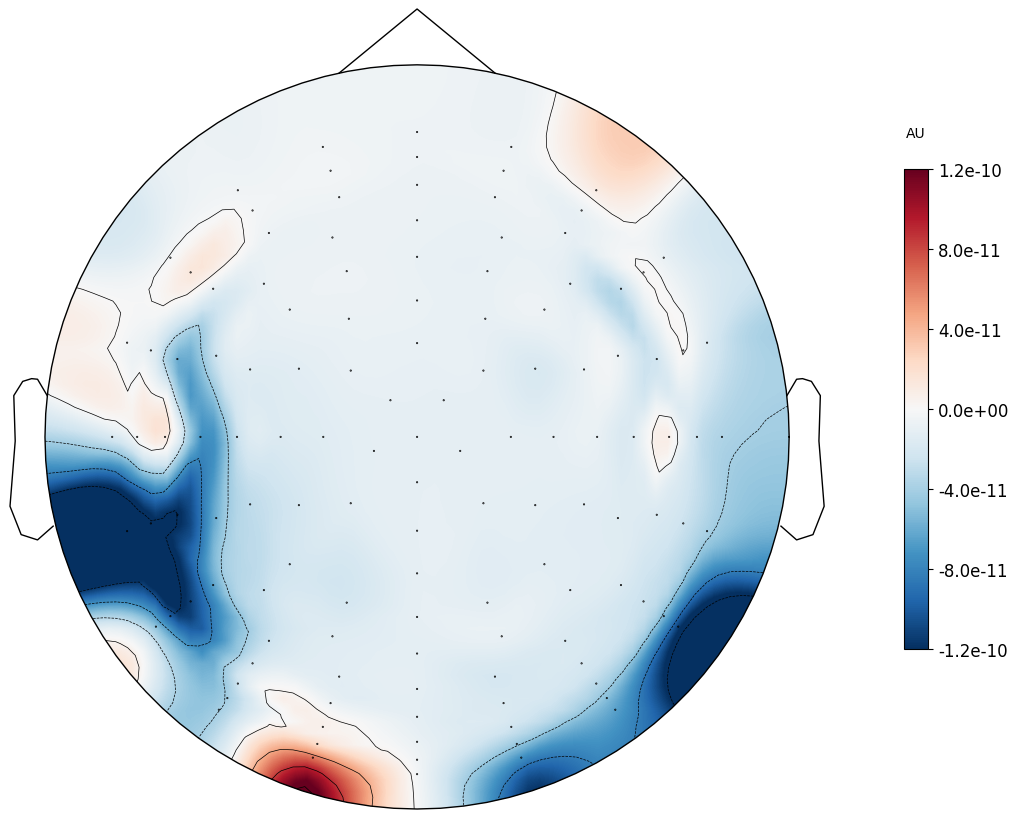

In [6]:
# -*- coding: utf-8 -*-

"""
@author: Nicolás Nieto - nnieto@sinc.unl.edu.ar

Plot power difference between two clases or conditions.

- Adjusted plot_topomap function to be compatible with newer versions of MNE:
    -deleted unit, title parameters
    -changed vmin and vmax to vlim tuple  (Michał Madej & Dawid Jędrzejewski)

- root_spectrograms and save_dir paths changed (Michał Madej)
"""
# In[] Imports modules

import matplotlib.pyplot as plt
import numpy as np

from utilities import Ensure_dir
from data_extraction import Extract_TFR

# In[] Imports modules

root_spectrograms = "../Data/TRF/"
save_dir = "./Plots/"

TRF_method= "Morlet" # "Multitaper - "Morlet"
# Cue are present at t=0
tmin = 1
tmax = 3
TRF_type = "power"
# Baseline options
baseline_bool= False
baseline = [3,4]

# Normalized
normalized_bool = False

# Plot Options
outlines = "head"      # "head" - "skirt"
sensors = True
sphere = None

# Saving 
save_bool = True
# Prefix for saving
prefix="TRF_differences_Topomaps"

# Comparation 1
Condition_1= "Vis"
Class_1 = "All"

# Comparation 2
Condition_2= "Pron"
Class_2 = "All"

# Bands
bands = [(0.5, 4, 'Delta (0.5-4 Hz)'), (4, 8, 'Theta (4-8 Hz)'), (8, 12, 'Alpha (8-12 Hz)'),
 (12, 30, 'Beta (12-30 Hz)'), (30, 45, 'Low Gamma (30-45Hz)'), (55, 100, 'High Gamma (55-100 Hz)')]



# In[] Load Data

# Load Class and condition
power_1 = Extract_TFR(TRF_dir = root_spectrograms, Cond = Condition_1, Class = Class_1, TFR_method = TRF_method, TRF_type = TRF_type)

# Load Class and Condition
power_2 = Extract_TFR(TRF_dir = root_spectrograms, Cond = Condition_2, Class = Class_2, TFR_method = TRF_method, TRF_type = TRF_type)


# Create a new Power where the diference will be stored
power_dif=power_1.copy()
if baseline_bool:
    power_1.apply_baseline(baseline)
    power_2.apply_baseline(baseline)


if normalized_bool:
    power_dif._data = (power_1._data - power_2._data) / np.maximum(power_1._data, power_2._data)
    # Plot limit per band - [min_lim, max_lim]
    vlim= [(-1, 1),(-1, 1),(-1, 1),(-1, 1),(-1, 1),(-1, 1)]

else: 
    power_dif._data = power_1._data - power_2._data
    # Plot limit per band - [min_lim, max_lim]
    vlim= [(-7.5e-9, 7.5e-9),(-9e-10, 9e-10),(-3e-10, 3e-10),(-9e-11, 9e-11),(-1.2e-10, 1.2e-10),(-1.2e-10, 1.2e-10)]


# In[]: Plotting
fontsize=20
plt.rcParams.update({'font.size': fontsize})
plt.rcParams.update({'legend.framealpha':0})


for band in range (len(bands)):
    bands_loop = bands[band]
    vlim_loop = vlim[band]
    fig = plt.figure(figsize=(20,10))
    ax =  fig.add_axes([0.1,0.1,0.8,0.8])
    
    power_dif.plot_topomap(fmin=bands_loop[0], fmax=bands_loop[1], tmin=tmin, tmax=tmax,
                    show=False, axes=ax, vlim =(vlim_loop[0], vlim_loop[1]),
                    outlines=outlines, sensors=sensors, sphere=sphere)
    
    if save_bool:
        Ensure_dir(save_dir)    
        
        if baseline_bool:
            fig.savefig(save_dir + prefix+'_'+Condition_1+'_'+Class_1+'_vs_'+Condition_2+'_'+Class_2+'_band'+str(band)+'_Baseline.png',
                        transparent = True , pad_inches= 0.5)  

        else :
            fig.savefig(save_dir + prefix+'_'+Condition_1+'_'+Class_1+'_vs_'+Condition_2+'_'+Class_2+'_band'+str(band)+'_NO_Baseline.png',
                        transparent = True)  
